In [17]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap
# import sarchl
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
single_data = pd.read_csv('./slowdown_single.csv',index_col=0)
data = pd.concat([single_data,pd.read_csv('./slowdown_unlimited.csv',index_col=0)])
data

Benchmark        0        1        2          resources
0       ATAX     1166    68797   103734      single thread
1         BS    85689   383658   670185      single thread
2        FWT    71423   724290   990728      single thread
3        FIR   430829  2022309  3151808      single thread
4        FLW    85181   340696   598706      single thread
5         KM    52908   808511  1236707      single thread
6         MM   239865   807454  1111454      single thread
7         MT    17706   603736   815476      single thread
8         PR  1954734   989881  1543084      single thread
9       ReLU        0   546053   774553      single thread
10      SPMV     8289   788016  1169290      single thread
0       ATAX     1203    70180   129449  unlimited threads
1         BS    92858   366206   383165  unlimited threads
2        FWT    71474   670688   399260  unlimited threads
3        FIR   412936  1948476  1012757  unlimited threads
4        FLW    93128   327024   346480  unlimited threads
5         KM    49191   772553   591238  unlimited threads
6         MM   222013   794153   415059  unlimited threads
7         MT    17032   559779   381019  unlimited threads
8         PR  1810912   954810   703882  unlimited threads
9       ReLU        0   512422   483893  unlimited threads
10      SPMV     7735   700674   487447  unlimited threads

In [19]:
data = data.melt(id_vars=['Benchmark','resources'],value_vars=['0','1','2'])
data.columns=['Benchmark','resources','settingID','slowdown']

In [20]:
data['combination']=data['settingID']+ '+' + data['resources']
data = data[['Benchmark','combination','slowdown']]

In [32]:
emu=data.loc[(data['combination']=='0+unlimited threads')]
emu=emu.drop(19)
print(emu['slowdown'].mean())
emu

101757.0


Benchmark          combination  slowdown
11      ATAX  0+unlimited threads      1203
12        BS  0+unlimited threads     92858
13       FWT  0+unlimited threads     71474
14       FIR  0+unlimited threads    412936
15       FLW  0+unlimited threads     93128
16        KM  0+unlimited threads     49191
17        MM  0+unlimited threads    222013
18        MT  0+unlimited threads     17032
20      ReLU  0+unlimited threads     50000
21      SPMV  0+unlimited threads      7735

In [33]:
timing=data.loc[(data['combination']=='1+unlimited threads')]
timing['slowdown'].mean()

697905.9090909091

In [22]:
data=data.loc[(data['combination']=='1+unlimited threads')| (data['combination']=='0+unlimited threads')]

In [23]:
data

Benchmark          combination  slowdown
11      ATAX  0+unlimited threads      1203
12        BS  0+unlimited threads     92858
13       FWT  0+unlimited threads     71474
14       FIR  0+unlimited threads    412936
15       FLW  0+unlimited threads     93128
16        KM  0+unlimited threads     49191
17        MM  0+unlimited threads    222013
18        MT  0+unlimited threads     17032
19        PR  0+unlimited threads   1810912
20      ReLU  0+unlimited threads         0
21      SPMV  0+unlimited threads      7735
33      ATAX  1+unlimited threads     70180
34        BS  1+unlimited threads    366206
35       FWT  1+unlimited threads    670688
36       FIR  1+unlimited threads   1948476
37       FLW  1+unlimited threads    327024
38        KM  1+unlimited threads    772553
39        MM  1+unlimited threads    794153
40        MT  1+unlimited threads    559779
41        PR  1+unlimited threads    954810
42      ReLU  1+unlimited threads    512422
43      SPMV  1+unlimited threads    700674

In [24]:
data.at[20,'slowdown']=50000
# data.at[19,'slowdown']=90000

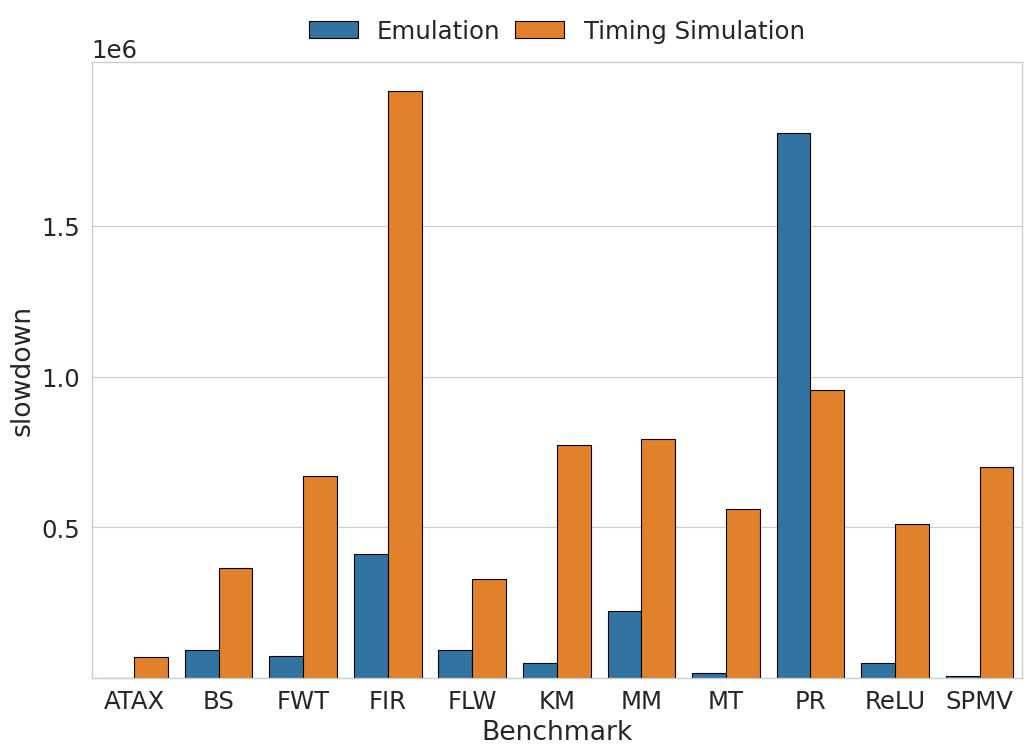

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=data, 
            x='Benchmark', hue='combination', y='slowdown', 
         ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Emulation','Timing Simulation'], 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.05), loc=10, ncol=2)
# ax.set_ylim(0, 2.2*10**6)
ax.set_yticks([0.5*10**6,1.0*10**6, 1.5*10**6])
plt.savefig('slowdown_intro.pdf', bbox_inches='tight')
plt.show()